# Colormaps

Seeing if different colormaps would change model mAP. HSV, Hot, Inferno are used from OpenCV library

In [20]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

# Define colormap functions
def apply_colormap(image, cmap):
    norm_image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
    colormap_image = cv2.applyColorMap(norm_image.astype(np.uint8), cmap)
    return colormap_image

# Define colormaps
colormaps = {
    'hsv': cv2.COLORMAP_HSV,
    'hot': cv2.COLORMAP_HOT,
    'inferno': cv2.COLORMAP_INFERNO
}

def process(input_folder, output_folders, colormaps):
    # Create output directories if they don't exist
    for folder in output_folders.values():
        if not os.path.exists(folder):
            os.makedirs(folder)
    # Process each image in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith('.tif') or filename.endswith('.tiff'):
            image_path = os.path.join(input_folder, filename)
            image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    
            for cmap_name, cmap in colormaps.items():
                colormap_image = apply_colormap(image, cmap)
                output_path = os.path.join(output_folders[cmap_name], filename.replace('.tiff', '.jpg'))
                cv2.imwrite(output_path, colormap_image)

In [21]:
input_folder = "/data1/jingxia3/SURA/FLIR/images_thermal_train/analyticsData"
output_folders = {
    "hsv": "/data1/jingxia3/SURA/FLIR/images_thermal_train/output_hsv",
    "hot": "/data1/jingxia3/SURA/FLIR/images_thermal_train/output_hot",
    "inferno": "/data1/jingxia3/SURA/FLIR/images_thermal_train/output_inferno"
}

process(input_folder, output_folders, colormaps)

In [22]:
input_folder = "/data1/jingxia3/SURA/FLIR/video_thermal_test/analyticsData"
output_folders = {
    "hsv": "/data1/jingxia3/SURA/FLIR/video_thermal_test/output_hsv",
    "hot": "/data1/jingxia3/SURA/FLIR/video_thermal_test/output_hot",
    "inferno": "/data1/jingxia3/SURA/FLIR/video_thermal_test/output_inferno"
}

process(input_folder, output_folders, colormaps)

In [23]:
input_folder = "/data1/jingxia3/SURA/FLIR/images_thermal_val/analyticsData"
output_folders = {
    "hsv": "/data1/jingxia3/SURA/FLIR/images_thermal_val/output_hsv",
    "hot": "/data1/jingxia3/SURA/FLIR/images_thermal_val/output_hot",
    "inferno": "/data1/jingxia3/SURA/FLIR/images_thermal_val/output_inferno"
}

process(input_folder, output_folders, colormaps)

In [25]:
input_folder = "/data1/jingxia3/SURA/BimodalVideo/thermal_frames_cropped"
output_folders = {
    "hsv": "/data1/jingxia3/SURA/BimodalVideo/output_hsv",
    "hot": "/data1/jingxia3/SURA/BimodalVideo/output_hot",
    "inferno": "/data1/jingxia3/SURA/BimodalVideo/output_inferno"
}

# Create output directories if they don't exist
for folder in output_folders.values():
    if not os.path.exists(folder):
        os.makedirs(folder)

# Process each image in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.jpg'):
        image_path = os.path.join(input_folder, filename)
        image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

        for cmap_name, cmap in colormaps.items():
            colormap_image = apply_colormap(image, cmap)
            output_path = os.path.join(output_folders[cmap_name], filename)
            cv2.imwrite(output_path, colormap_image)

Then I made the datasets

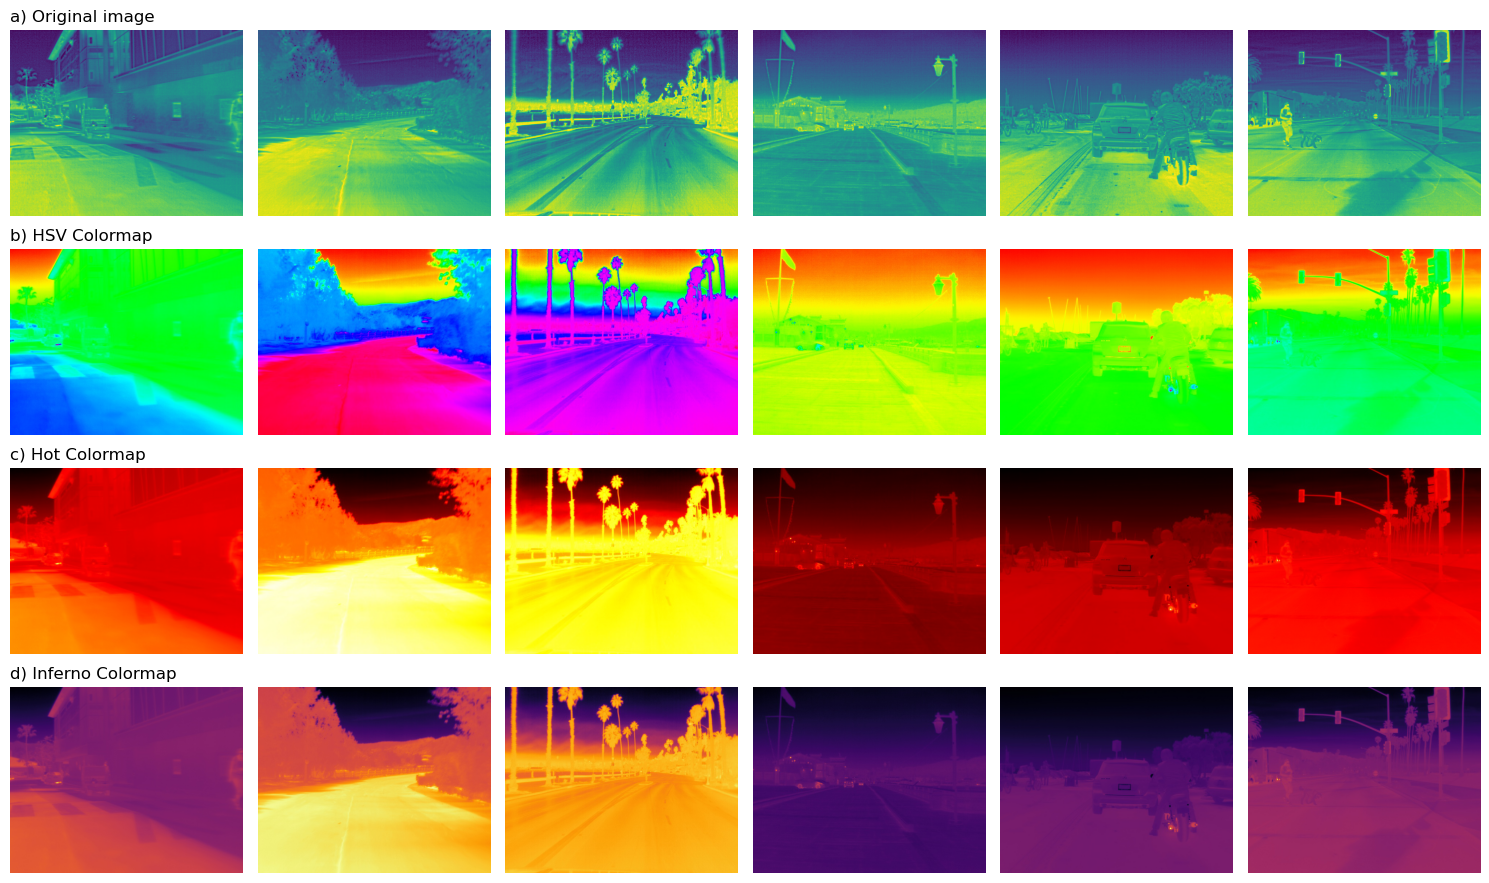

In [34]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Directories containing the images
dir1 = "/data1/jingxia3/SURA/FLIR/images_thermal_train/images"
dir2 = "/data1/jingxia3/SURA/FLIR/images_thermal_train/output_hsv"
dir3 = "/data1/jingxia3/SURA/FLIR/images_thermal_train/output_hot"
dir4 = "/data1/jingxia3/SURA/FLIR/images_thermal_train/output_inferno"

# Get the list of image files in each directory
files = os.listdir(dir1)  # Assuming all directories have the same file names

selected_files = random.sample(files, 6)

fig, axs = plt.subplots(4, 6, figsize=(15, 9))

# Function to load and display images
def display_images(axs, row, directory, file_names):
    for col, file_name in enumerate(file_names):
        img_path = os.path.join(directory, file_name)
        img = Image.open(img_path)
        axs[row, col].imshow(img)
        axs[row, col].axis('off')

# Display images from each directory in the respective row
display_images(axs, 0, dir1, selected_files)
display_images(axs, 1, dir2, selected_files)
display_images(axs, 2, dir3, selected_files)
display_images(axs, 3, dir4, selected_files)

titles = ["a) Original image", "b) HSV Colormap", "c) Hot Colormap", "d) Inferno Colormap"]

for i, name in enumerate(titles):
    axs[i, 0].set_title(name, loc='left', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

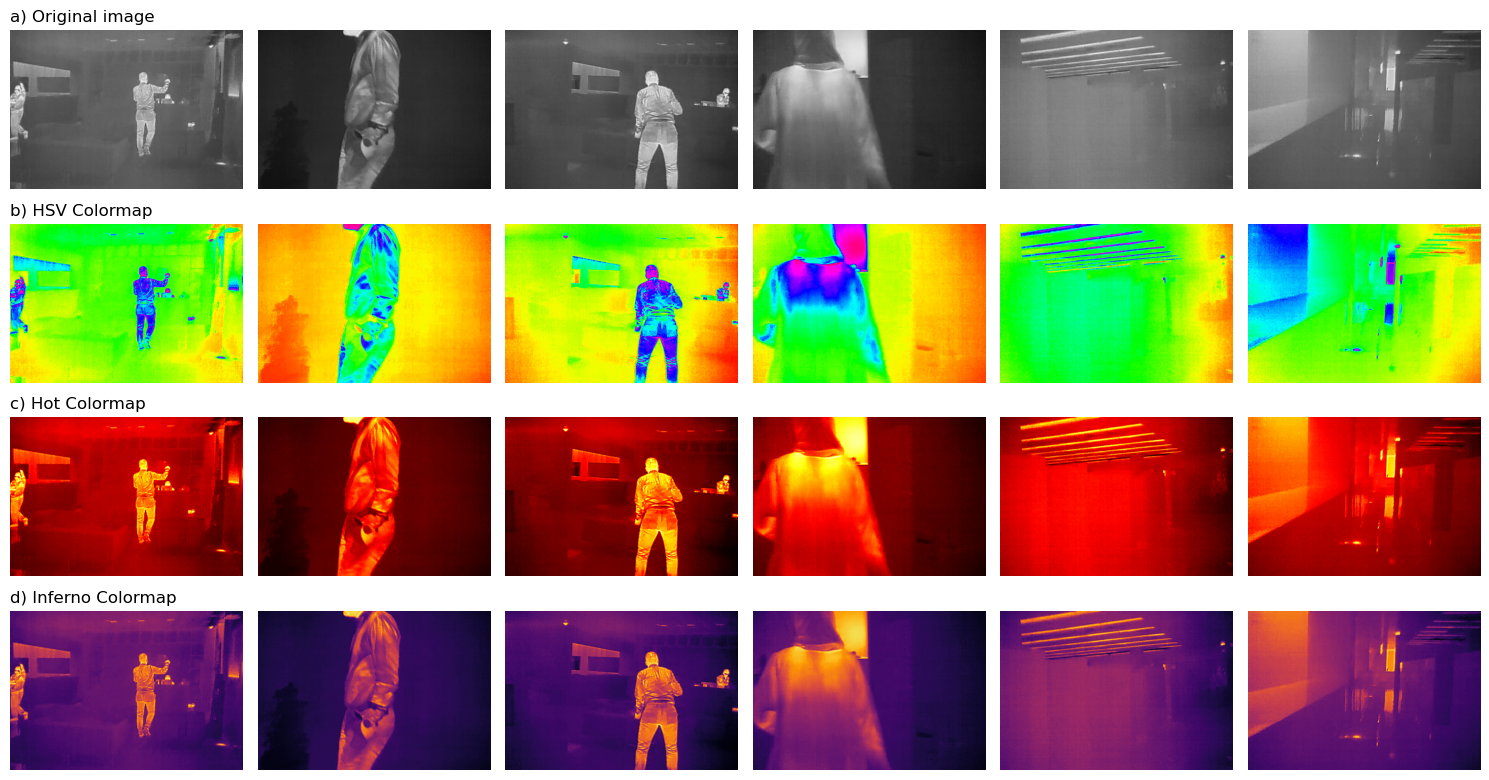

In [37]:
# Directories containing the images
dir1 = "/data1/jingxia3/SURA/BimodalVideo/thermal_frames_cropped"
dir2 = "/data1/jingxia3/SURA/BimodalVideo/output_hsv"
dir3 = "/data1/jingxia3/SURA/BimodalVideo/output_hot"
dir4 = "/data1/jingxia3/SURA/BimodalVideo/output_inferno"

# Get the list of image files in each directory
files = os.listdir(dir1)  # Assuming all directories have the same file names

selected_files = random.sample(files, 6)

fig, axs = plt.subplots(4, 6, figsize=(15, 8))

# Display images from each directory in the respective row
display_images(axs, 0, dir1, selected_files)
display_images(axs, 1, dir2, selected_files)
display_images(axs, 2, dir3, selected_files)
display_images(axs, 3, dir4, selected_files)

titles = ["a) Original image", "b) HSV Colormap", "c) Hot Colormap", "d) Inferno Colormap"]

for i, name in enumerate(titles):
    axs[i, 0].set_title(name, loc='left', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()